<a href="https://colab.research.google.com/github/VineetGargOfficials/Learning-PyTorch/blob/main/fmist_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else "CPU")
print(f'Using device: {device}')

Using device: cuda


In [17]:
torch.manual_seed(42)

In [18]:
df = pd.read_csv('fashion-mnist_train.csv')
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


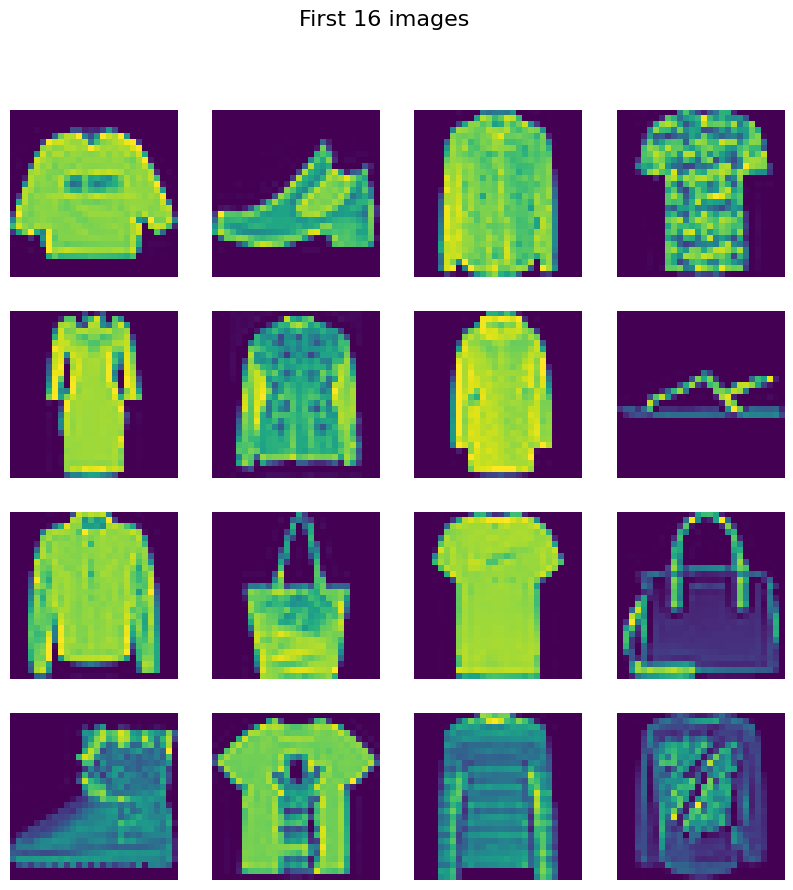

In [19]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images", fontsize= 16)

for i in range(16):
  ax = axes[i // 4, i % 4]
  img = df.iloc[i, 1:].values.reshape(28, 28)
  ax.imshow(img)
  ax.axis('off')

plt.show()

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, 1:].values, df.iloc[:, 0].values, test_size = 0.2)

In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [23]:
train_dataset = CustomDataset(X_train, Y_train)
test_dataset = CustomDataset(X_test, Y_test)

In [24]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, pin_memory=True)

In [25]:
class MySimpleNN(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, X):
    return self.network(X)


In [29]:
learning_rate = 0.01
num_epochs = 100

model = MySimpleNN(X_train.shape[1])
model = model.to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [30]:
for epoch in range(num_epochs):
  total_epochs = 0
  for batch_features, batch_labels in train_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    output = model(batch_features)
    loss = loss_function(output, batch_labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_epochs = total_epochs + loss.item()


  print(f'Epoch: {epoch + 1}, Loss: {total_epochs / len(train_loader)}')



Epoch: 1, Loss: nan
Epoch: 2, Loss: nan


KeyboardInterrupt: 

In [ ]:
model.eval()

total=0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    output = model(batch_features)
    _, predicted = torch.max(output.data, 1)

    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()

print(f'Accuracy: {100 * correct / total}')